In [1]:
import numpy as np
import pandas as pd
import time

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/social-network-ads")

print("Path to dataset files:", path)

100%|██████████| 3.27k/3.27k [00:00<00:00, 1.07MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1


In [8]:
df = pd.read_csv(path + "/Social_Network_Ads.csv")

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df.shape

(400, 5)

In [12]:
df = df[['Age','EstimatedSalary','Purchased']]

In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [16]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled.shape

(400, 2)

In [18]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=400,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7406 - loss: 0.5946 - val_accuracy: 0.4375 - val_loss: 0.7024
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7406 - loss: 0.5869 - val_accuracy: 0.4625 - val_loss: 0.7021
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7531 - loss: 0.5813 - val_accuracy: 0.4875 - val_loss: 0.7018
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.7594 - loss: 0.5767 - val_accuracy: 0.5000 - val_loss: 0.7015
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7688 - loss: 0.5726 - val_accuracy: 0.5000 - val_loss: 0.7012
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7875 - loss: 0.5689 - val_accuracy: 0.5125 - val_loss: 0.7009
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.7875 - loss: 0.5654 - val_accuracy: 0.5125 - val_loss: 0.7006
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.8000 - loss: 0.5622 - val_accuracy: 0.5125 - val_

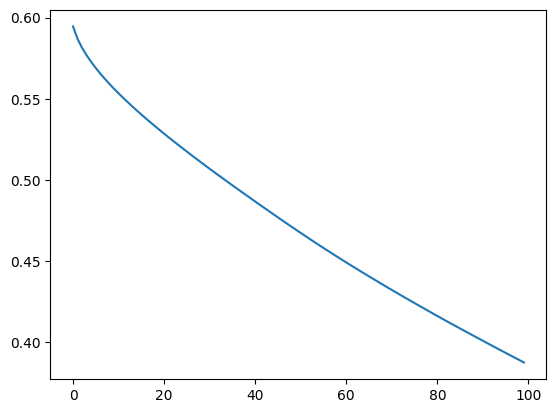

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [26]:
# stochastic GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3793 - val_accuracy: 0.6500 - val_loss: 0.5854
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 0.3172 - val_accuracy: 0.6375 - val_loss: 0.5143
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.2536 - val_accuracy: 0.6375 - val_loss: 0.4721
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.3424 - val_accuracy: 0.6375 - val_loss: 0.4456
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.2466 - val_accuracy: 0.6500 - val_loss: 0.4270
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.2963 - val_accuracy: 0.6500 - val_loss: 0.4161
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8618 - loss: 0.2629 - val_accuracy: 0.6500 - val_loss: 0.4032
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4170 - val_accu

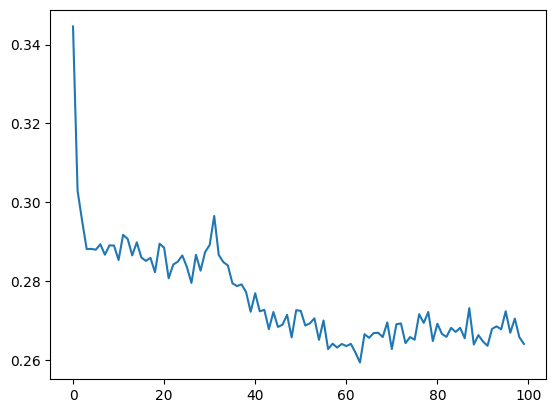

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [28]:
# mini batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=150,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9138 - loss: 0.2460 - val_accuracy: 0.9500 - val_loss: 0.1553
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9178 - loss: 0.2490 - val_accuracy: 0.9500 - val_loss: 0.1603
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9136 - loss: 0.2459 - val_accuracy: 0.9500 - val_loss: 0.1665
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9178 - loss: 0.2401 - val_accuracy: 0.9250 - val_loss: 0.1752
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9162 - loss: 0.2504 - val_accuracy: 0.9125 - val_loss: 0.1827
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9064 - loss: 0.2552 - val_accuracy: 0.9250 - val_loss: 0.1787
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9062 - loss: 0.2622 - val_accuracy: 0.9250 - val_loss: 0.1768
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9138 - loss: 0.2463 - val_accuracy: 0.9250 - val_loss

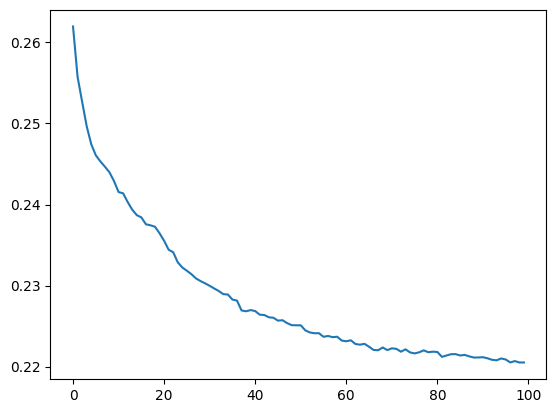

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])